### K-최근접 이웃 알고리즘 (K-Neares Neighbor, KNN)
- 임의의 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다.
- 가장 간단한 머신러닝 알고리증으로서, 직관적이고 나름 성능도 괜찮다.
- K를 어떻게 정하는지에 따라서 결과값이 바뀔 수 있다. K는 임의의 데이터가 주어졌을 때 가까운 이웃들의 개수이고 기본값은 5이다.
- K는 가장 가까운 5개의 이웃 데이터를 기반으로 분류하며, 일반적으로 홀수를 사용한다. 짝수일 경우 동점이 되어 하나의 결과를 도출할 수 없기 때문이다.

<img src="./images/knn01.png" width='400px'><img src="./images/knn02.png" width='400px' >

- KNN은 fit을 통해 훈련시키면, 학습하지 않고 저장만 해놓는다. 따라서 이러한 모델을 Lazy Model이라고 부른다.
- 새로운 데이터가 주어지면 그제서야 이웃 데이터를 보고 분류해나간다. 따라서 사전 모델링이 필요없는 real-time예측이 이루어진다.
<img src="./images/knn03.jpg" width='400px' margin-left = '20px'>

- 데이터와 데이터 사이의 거리를 구해야 더 가까운 클래스로 분류할 수 있으며,
  이는 유클리드 거리(Euclidean Distance) 방식과 맨해튼 거리(Manhattan Distance)방식이 있다.  
** 유클리드거리: 삼각함수, 맨해튼 거리: 직각 거리

In [1]:
import pandas as pd

corona_df = pd.read_csv('./datasets/corona.csv', low_memory=False)
c_df = corona_df.copy()
c_df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [2]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [3]:
c_df.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [4]:
c_df[c_df.Age_60_above == 'Yes']['Corona'].value_counts()

Corona
negative    23221
positive     2204
other         400
Name: count, dtype: int64

In [5]:
c_df.Corona.value_counts()

Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64

In [6]:
pre_c_df = c_df.copy()

In [7]:
columns = ['Test_date','Age_60_above','Sex','Ind_ID','Known_contact']
pre_c_df = pre_c_df.drop(labels = columns, axis=1)

In [8]:
pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
0,True,False,True,False,False,negative
1,False,True,False,False,False,positive
2,False,True,False,False,False,positive
3,True,False,False,False,False,negative
4,True,False,False,False,False,negative
...,...,...,...,...,...,...
278843,False,False,False,False,False,positive
278844,False,False,False,False,False,negative
278845,False,False,False,False,False,negative
278846,False,False,False,False,False,negative


In [9]:
pre_c_df = pre_c_df[~pre_c_df.Cough_symptoms.isna()]
pre_c_df = pre_c_df[~pre_c_df.Fever.isna()]
pre_c_df = pre_c_df[~pre_c_df.Sore_throat.isna()]
pre_c_df = pre_c_df[~pre_c_df.Shortness_of_breath.isna()]
pre_c_df = pre_c_df[~pre_c_df.Headache.isna()]

In [10]:
pre_c_df.reset_index(drop=True, inplace=True)

In [11]:
pre_c_df.drop_duplicates(inplace=True)

In [12]:
pre_c_df.reset_index(drop=True, inplace=True)

In [13]:
pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
0,True,False,True,False,False,negative
1,False,True,False,False,False,positive
2,True,False,False,False,False,negative
3,True,False,False,False,False,other
4,False,False,False,False,False,negative
...,...,...,...,...,...,...
87,False,True,True,False,True,negative
88,True,True,True,True,True,other
89,True,False,True,True,True,other
90,True,True,False,True,True,other


In [14]:
pre_c_df.Corona.value_counts()

Corona
negative    32
positive    32
other       28
Name: count, dtype: int64

In [15]:
neg = pre_c_df[pre_c_df.Corona == 'negative'].sample(28, random_state=124)
pos = pre_c_df[pre_c_df.Corona == 'positive'].sample(28, random_state=124)
other = pre_c_df[pre_c_df.Corona == 'other']

pre_c_df = pd.concat([neg, pos, other])
# pre_c_df.reset_index(drop=True, inplace=True)

In [16]:
pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
7,True,False,False,True,False,negative
38,False,False,True,True,False,negative
5,False,True,False,False,False,negative
86,True,False,False,True,True,negative
8,False,True,False,True,False,negative
...,...,...,...,...,...,...
85,True,False,False,True,True,other
88,True,True,True,True,True,other
89,True,False,True,True,True,other
90,True,True,False,True,True,other


In [17]:
pre_c_df.Corona.value_counts()

Corona
negative    28
positive    28
other       28
Name: count, dtype: int64

In [18]:
pre_c_df.value_counts()

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  Corona  
False           False  False        False                False     negative    1
True            False  True         False                True      negative    1
                                    True                 True      positive    1
                                                                   other       1
                                                                   negative    1
                                                                              ..
False           True   False        True                 True      negative    1
                                                         False     other       1
                                                                   negative    1
                                    False                True      positive    1
True            True   True         True                 True      positive    1
Name: count, Length: 84, dtype: i

In [19]:
import numpy as np

pre_c_df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache']] = \
        pre_c_df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath','Headache']].astype(np.int8)

pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
7,1,0,0,1,0,negative
38,0,0,1,1,0,negative
5,0,1,0,0,0,negative
86,1,0,0,1,1,negative
8,0,1,0,1,0,negative
...,...,...,...,...,...,...
85,1,0,0,1,1,other
88,1,1,1,1,1,other
89,1,0,1,1,1,other
90,1,1,0,1,1,other


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
targets  = encoder.fit_transform(pre_c_df.Corona)
pre_c_df['Target'] = targets

In [26]:
pre_c_df = pre_c_df.drop(labels = 'Corona', axis=1)

In [27]:
encoder.classes_

array(['negative', 'other', 'positive'], dtype=object)

In [28]:
pre_c_df.Target.value_counts()

Target
0    28
2    28
1    28
Name: count, dtype: int64

array([[<Axes: title={'center': 'Cough_symptoms'}>,
        <Axes: title={'center': 'Fever'}>],
       [<Axes: title={'center': 'Sore_throat'}>,
        <Axes: title={'center': 'Shortness_of_breath'}>],
       [<Axes: title={'center': 'Headache'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

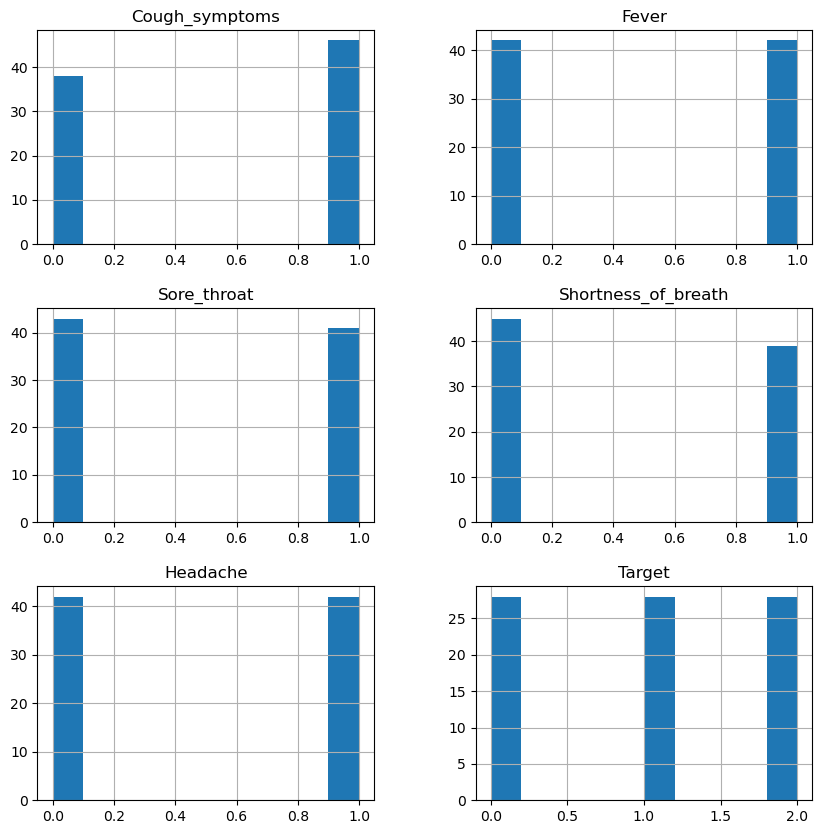

In [29]:
pre_c_df.hist(figsize = (10,10))

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size = 0.2, random_state=124)

knn_c = KNeighborsClassifier()

parameters = {
    'n_neighbors' : [3 ,5, 7]
}

g_knn_c = GridSearchCV(knn_c, param_grid=parameters, cv=5, refit=True, return_train_score=True)
g_knn_c.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [32]:
result_df = pd.DataFrame(g_knn_c.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'][0])
display(result_df)

{'n_neighbors': 3}


,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.162637,3
1,{'n_neighbors': 5},0.239560,2
2,{'n_neighbors': 7},0.282418,1


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [34]:
knn_c = g_knn_c.best_estimator_
prediction = knn_c.predict(X_test)

오차 행렬
[[2 2 2]
 [3 0 2]
 [5 1 0]]
정확도: 0.1176, 정밀도: 0.1176, 재현율: 0.1176, F1: 0.1176
################################################################################


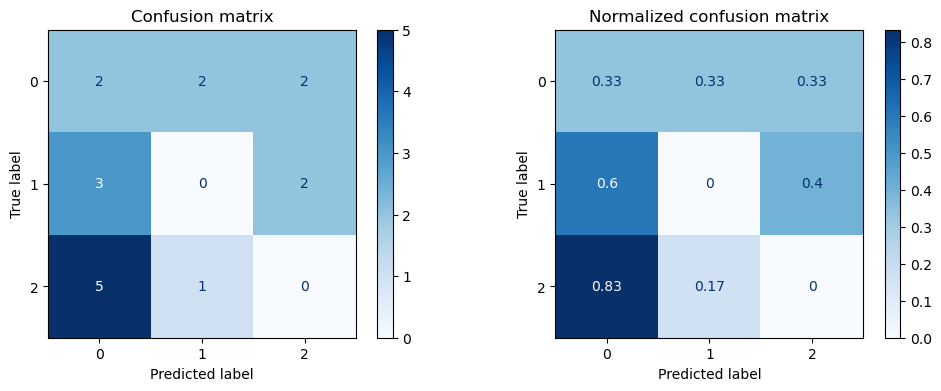

In [35]:
get_evaluation(y_test, prediction, knn_c, X_test)

In [38]:
from sklearn.inspection import permutation_importance


importance = permutation_importance(knn_c, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()


array([1, 0, 2, 4, 3], dtype=int64)

In [39]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f"{features.columns[i]}: {round(importance.importances_mean[i], 4)}")


Shortness_of_breath: -0.0255
Headache: -0.0725
Sore_throat: -0.098
Cough_symptoms: -0.1549
Fever: -0.1706
